# Bike Sharing Assignment : Multiple Linear Regression 

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Step 1: Reading and Understanding the Data

In [3]:
#Read the csv file using pandas
df = pd.read_csv('day.csv')

In [4]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.size

11680

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From the above info we can see that there is no missing values present. So we dont need to deal with missing values.

### Step 2: Visualising the Data


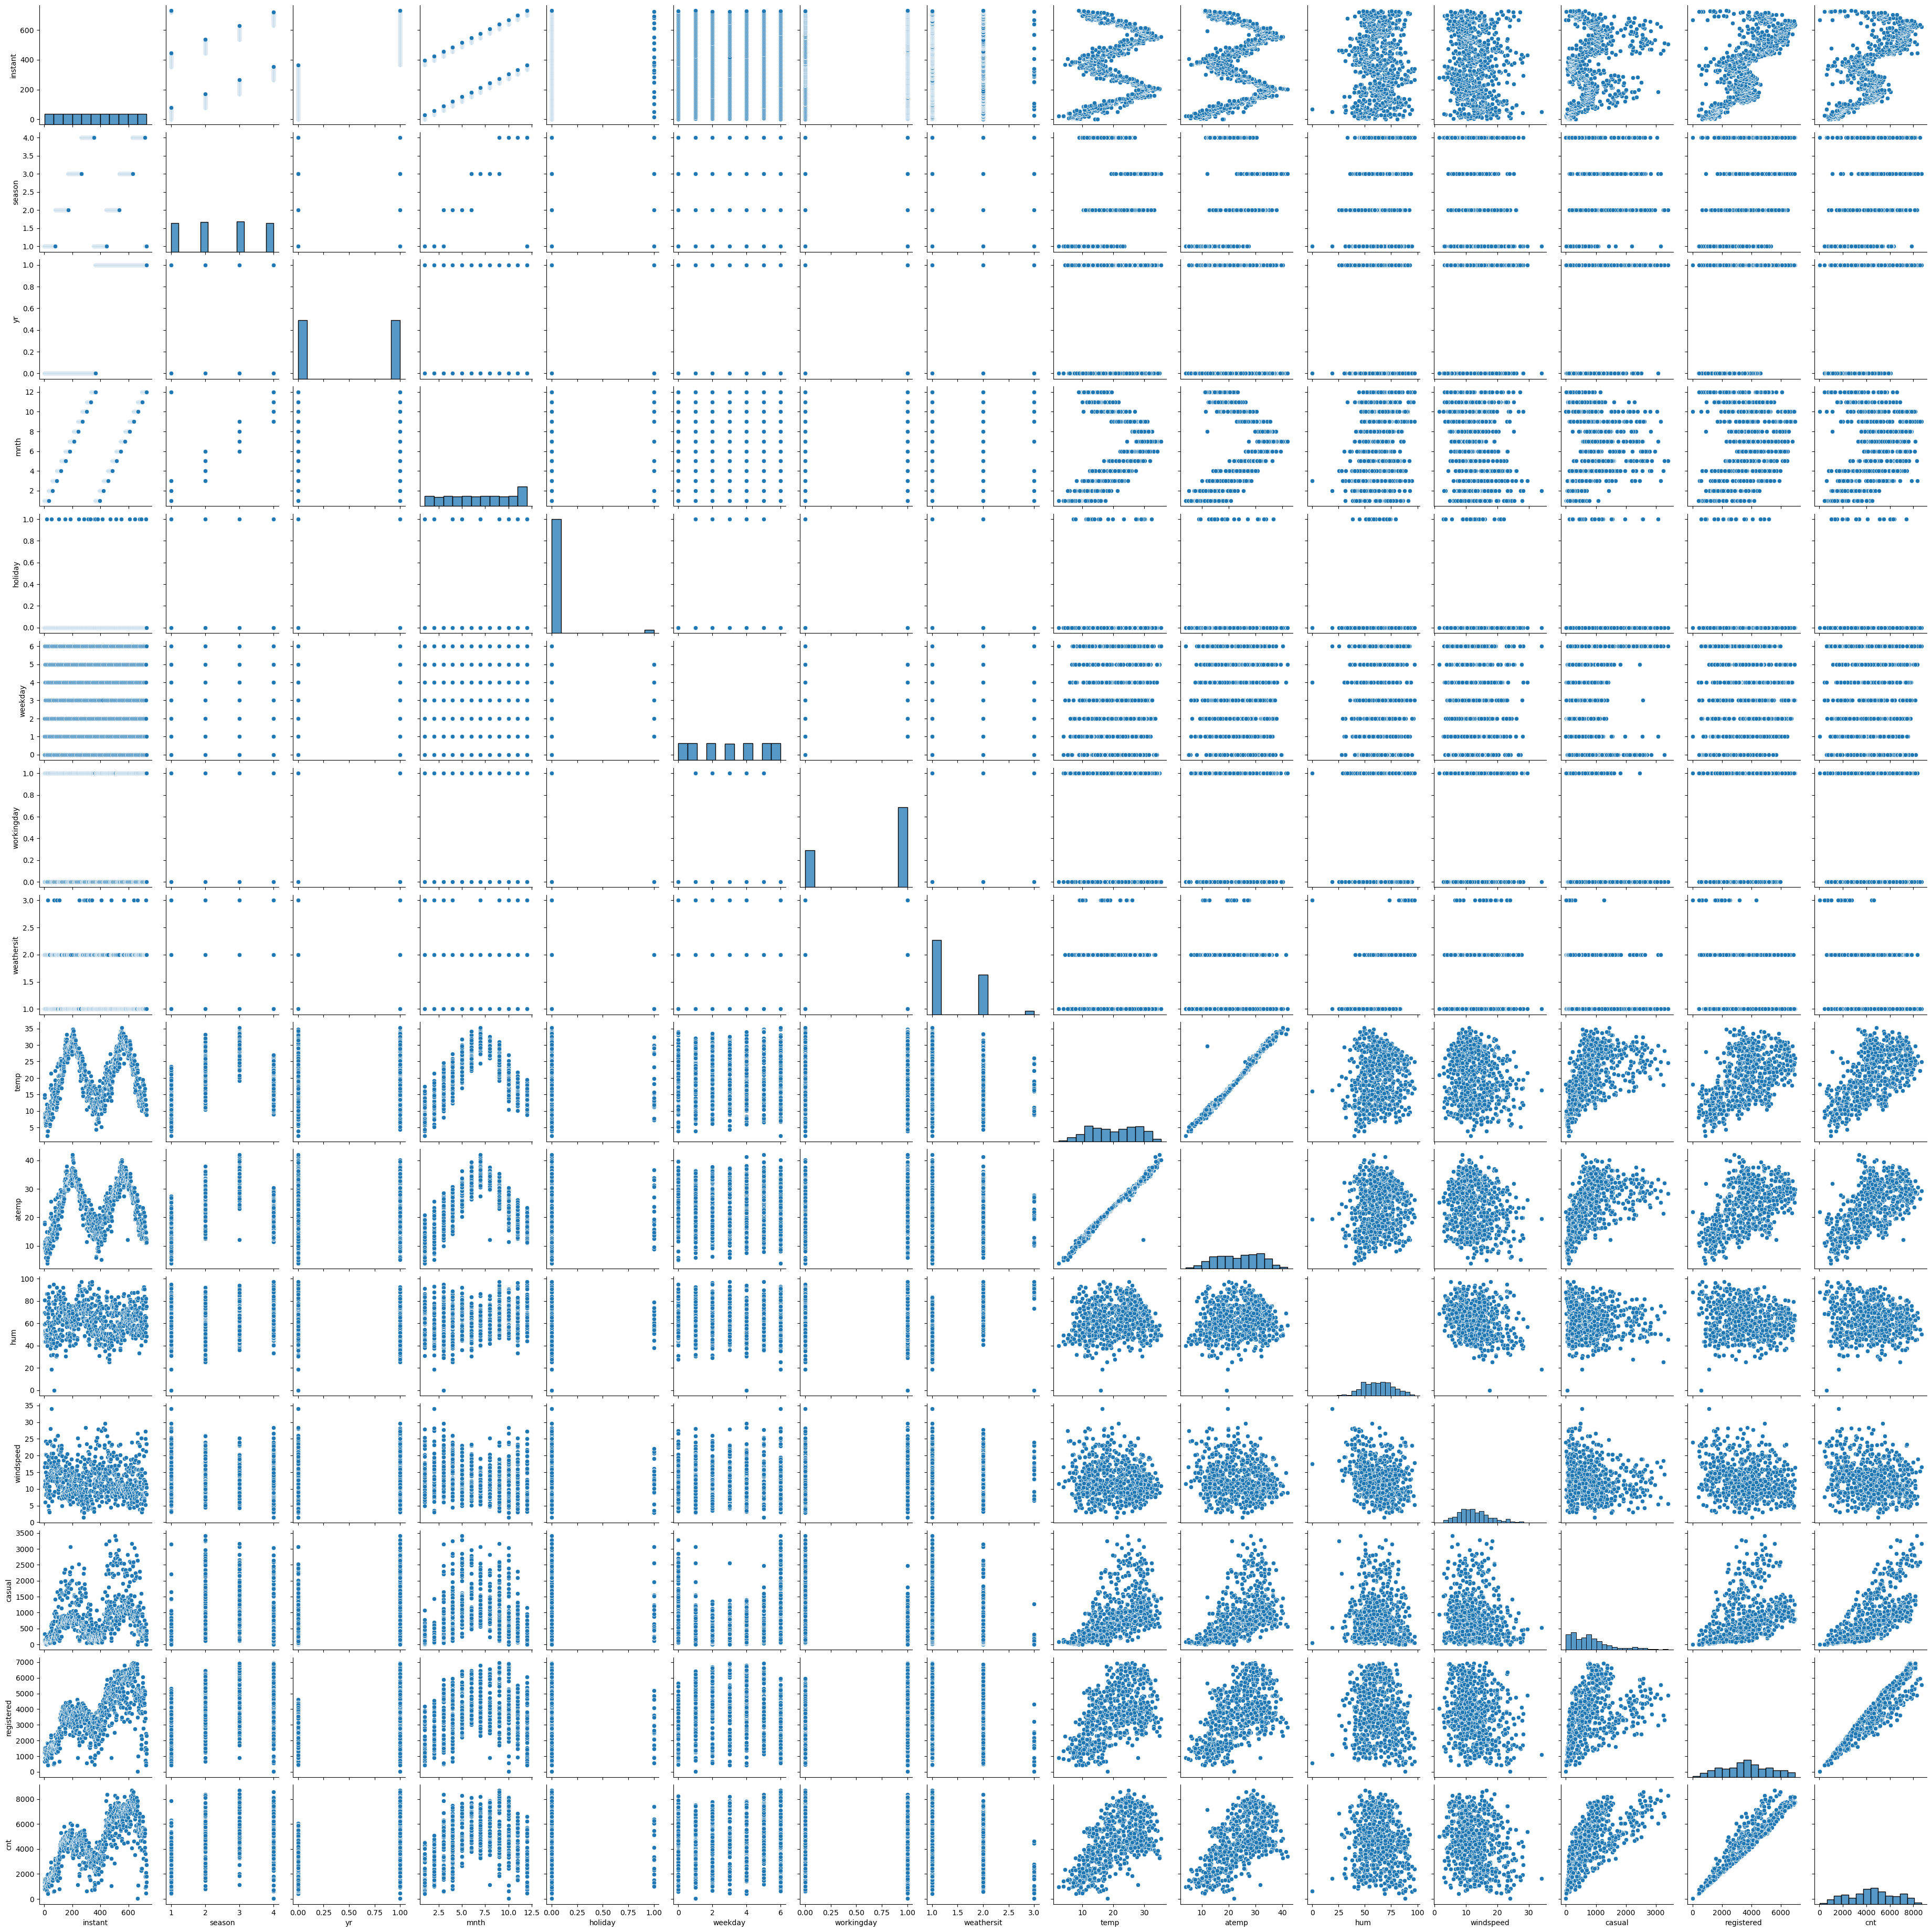

In [11]:
sns.pairplot(df)
plt.show()

From the above scatter plots we can see that majority of the variables are having linear relationship with cnt. So Linear Regression can be a good choice

#### Visualising Categorical Variables

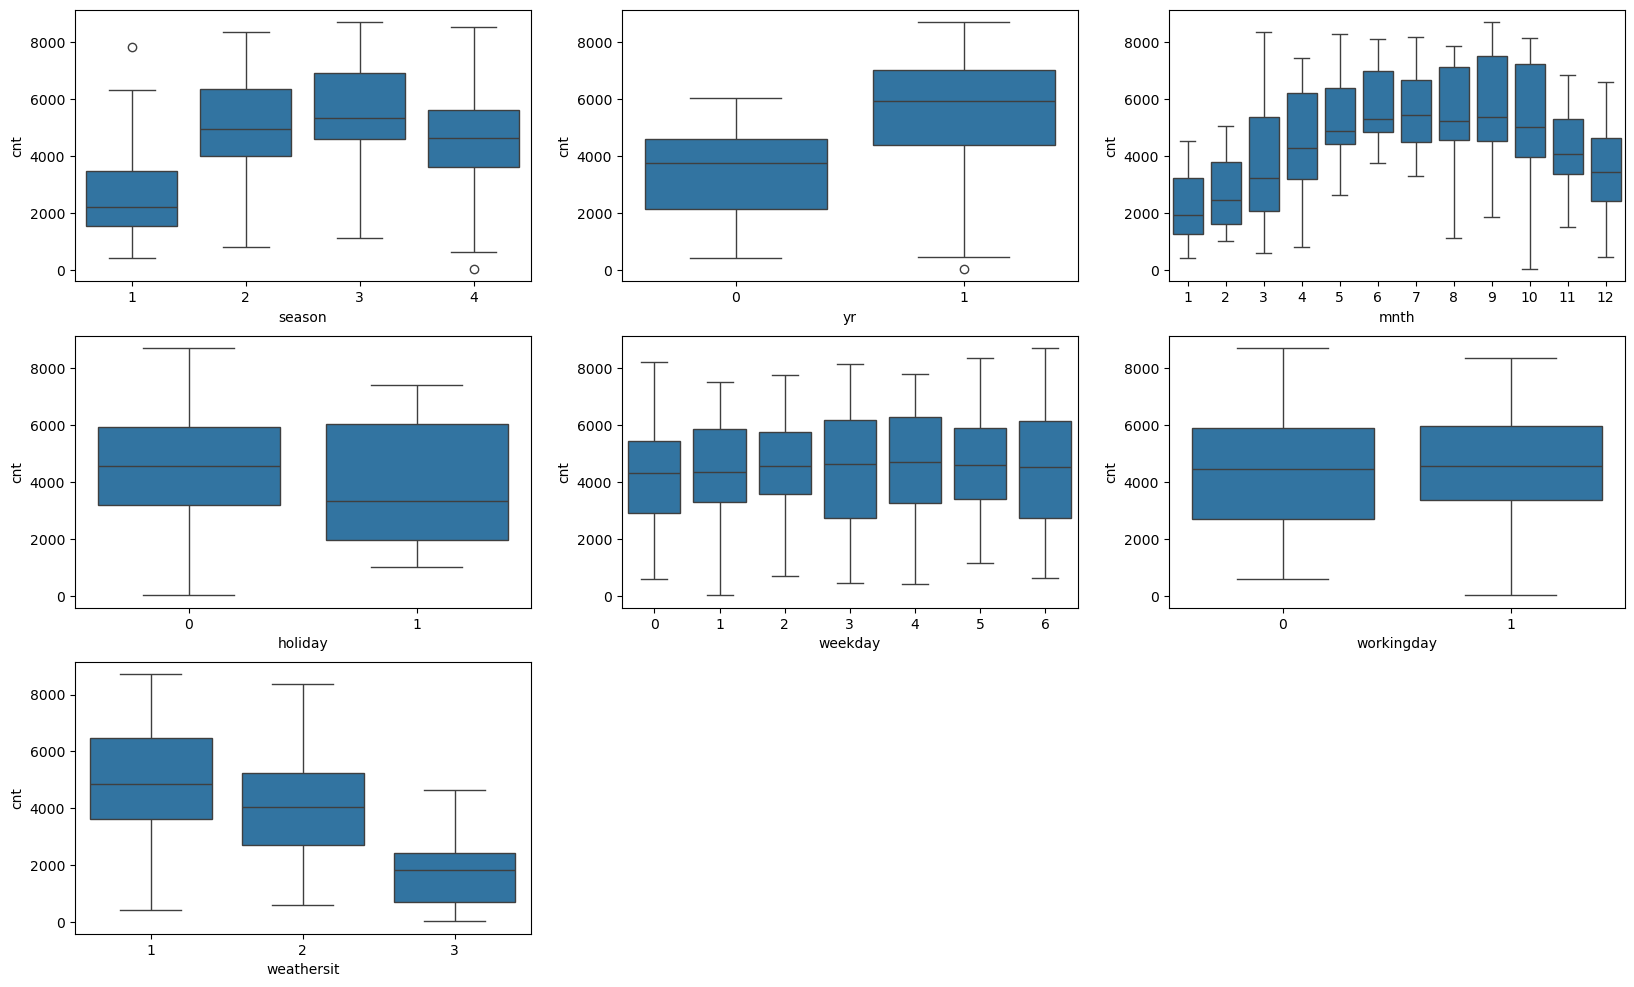

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Step 3: Data Preparation

In [13]:
# dropping the duplicates

df.drop_duplicates(inplace=True)

In [14]:
# verifying the shape of the dataframe after removing duplicate
df.shape

(730, 16)

In [15]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [16]:
# Droping instant column as it is index column which has nothing to do with target
# Dropping dteday as we have already have month and weekday columns to work with
# Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [17]:
# Mapping the columns season,yr,mnth,weekday,weathersit

df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = True)
df.mnth.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace = True)
df.weekday.replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     Sat           0   moderate  14.110847   
1  spring   0  Jan        0     Sun           0   moderate  14.902598   
2  spring   0  Jan        0     Mon           1       good   8.050924   
3  spring   0  Jan        0     Tue           1       good   8.200000   
4  spring   0  Jan        0     Wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [18]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [19]:
# Dummy variable creation for month, weekday, weathersit and season variables and
#drop the first column from status df using 'drop_first = True'.
df = pd.get_dummies(data=df,columns=["season","mnth","weekday","weathersit"],dtype=int,drop_first=True)

In [20]:
df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  ...  mnth_Oct  mnth_Sep  weekday_Mon  \
0              1              0  ...         0         0            0   
1              1              0  ...         0         0            0   
2              1              0  ...         0         0            1   
3              1              0  ...         0         0            0   
4              1              0  ...         0         0            0   

   weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  \
0            1            0            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            1   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 30 columns]

### Step 4: Splitting the Data into Training and Testing Sets


In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
#Rescaling feature
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
#Inspect Training set after scaling
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_spring  season_summer  ...  mnth_Oct  mnth_Sep  \
653  0.864243              0              0  ...         1         0   
576  0.827658              0              0  ...         0         0   
426  0.465255              1              0  ...         0         0   
728  0.204096              1              0  ...         0         0   
482  0.482973              0              1  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            1   
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            1            0            0   
482            0            1            0            0            0   

     weekday_Wed  weathersit_good  weathersit_moderate  
653            0                1                    0  
576            0                1                    0  
426            0                0                    1  
728            0                1                    0  
482            0                0                    1  

[5 rows x 30 columns]

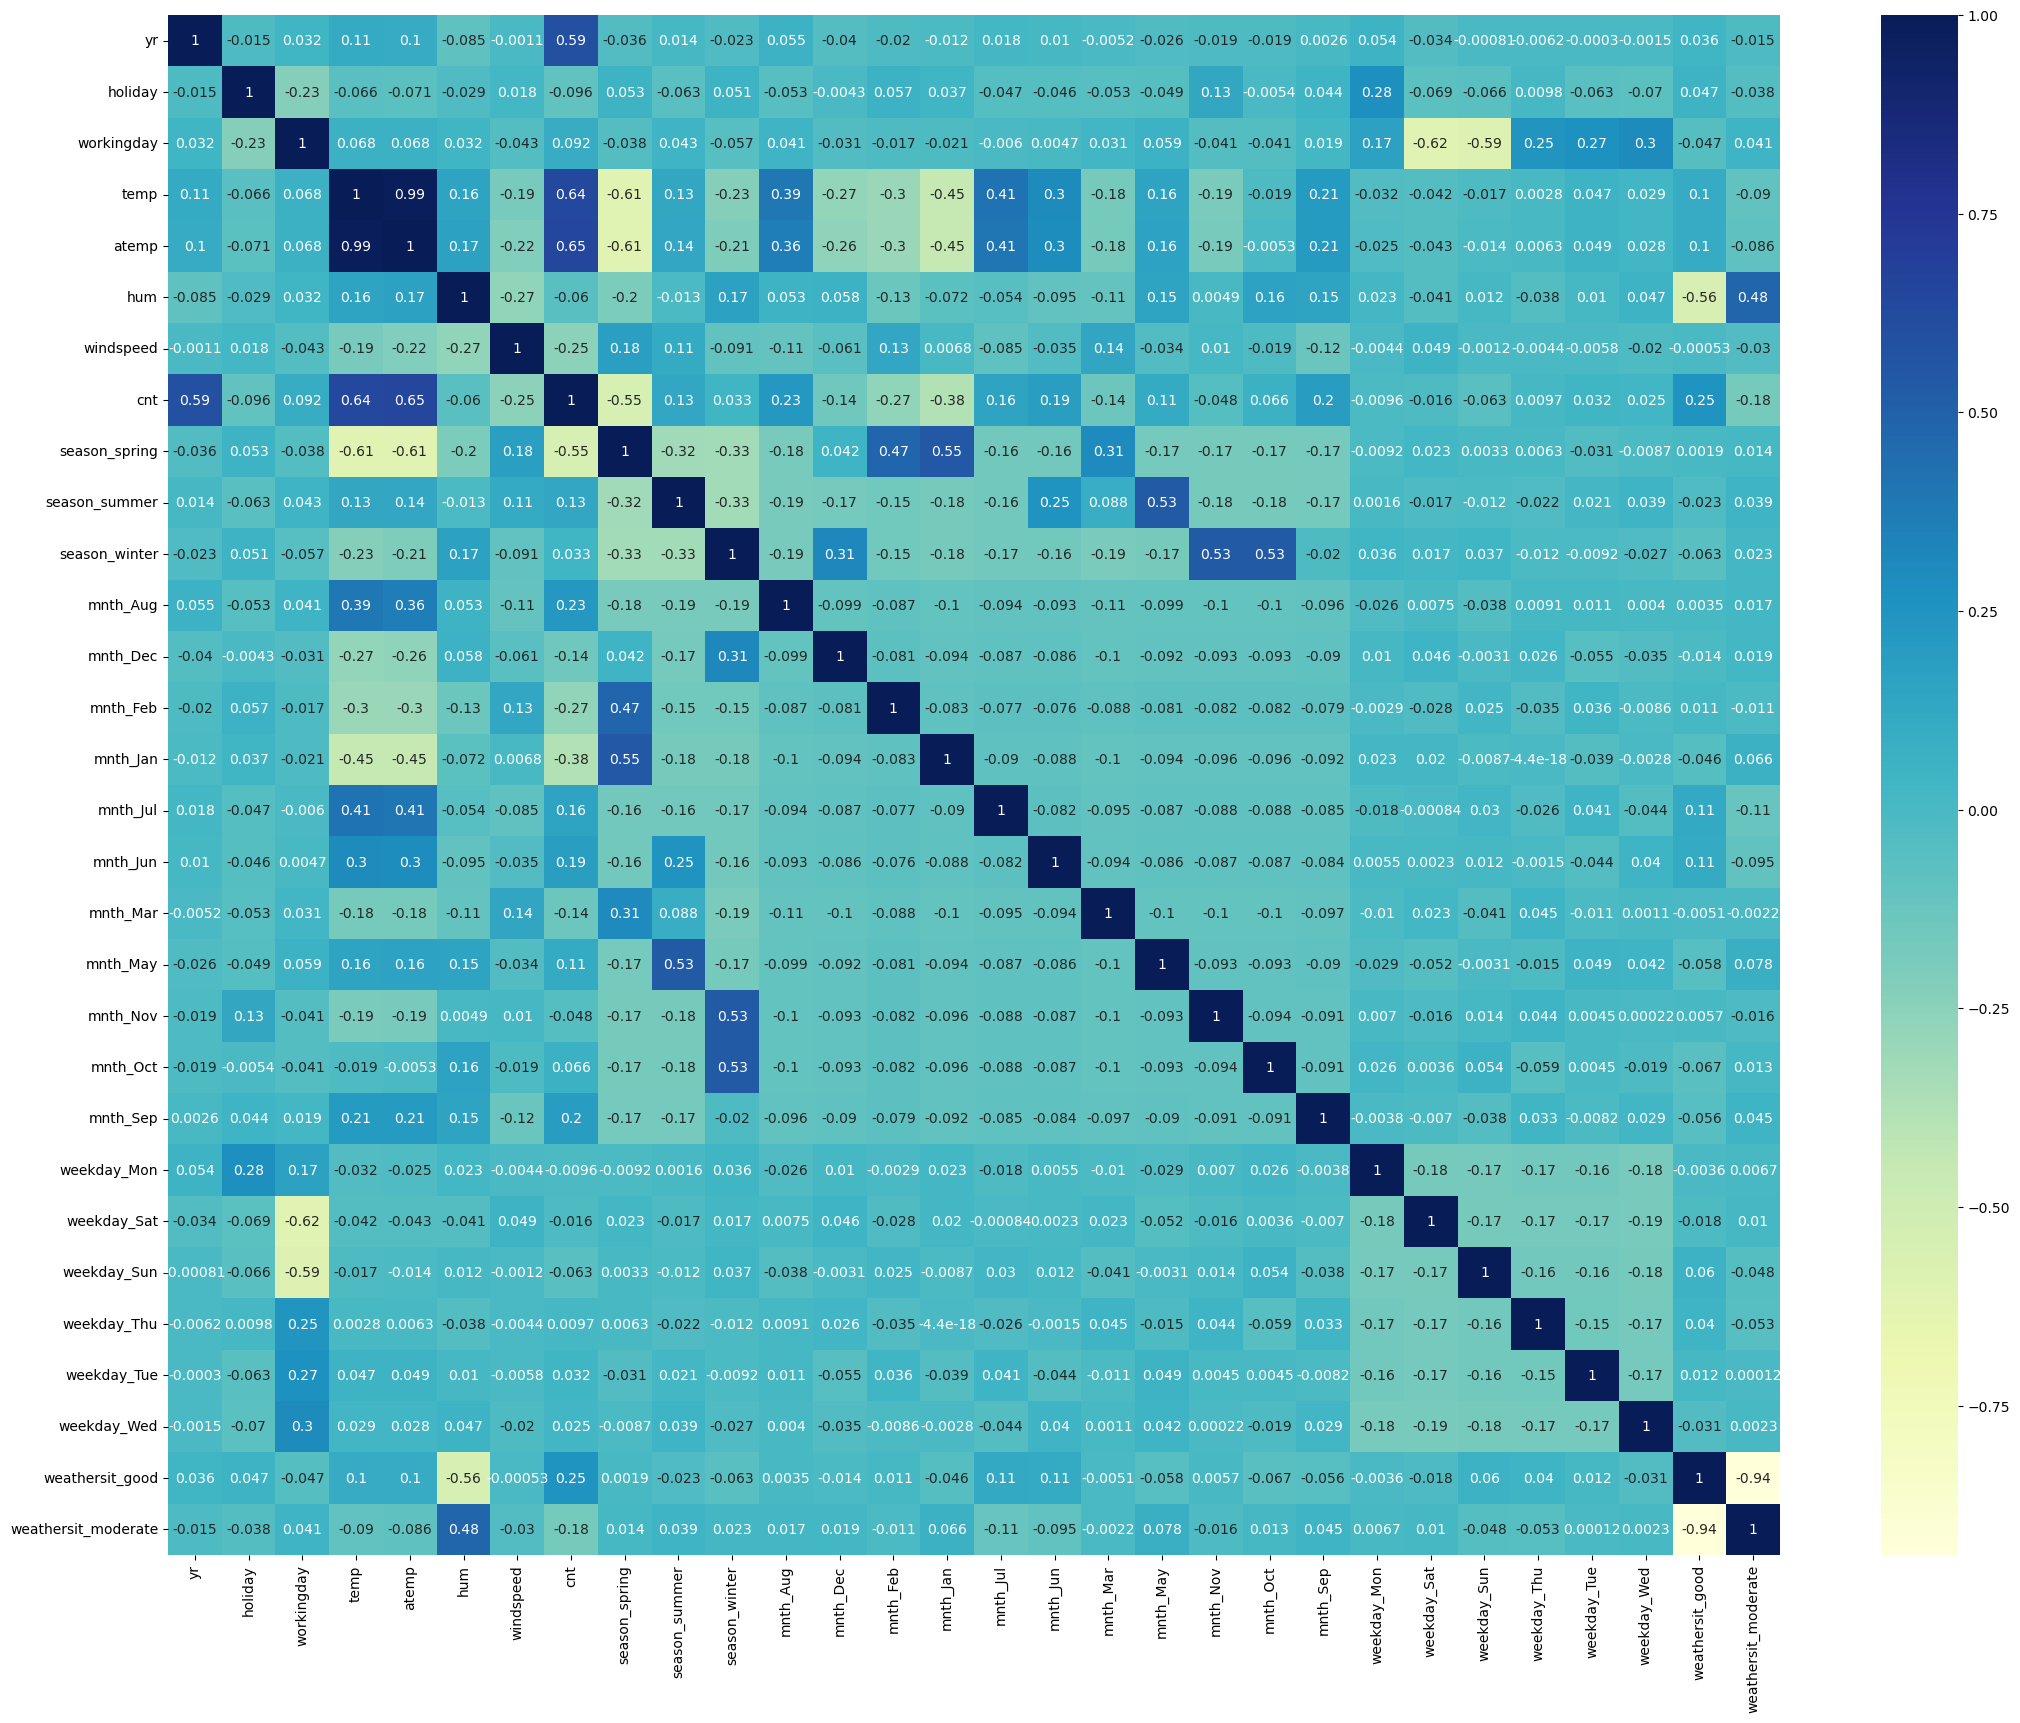

In [23]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### temp, atemp and yr seems to the correlated to cnt the most. 
 pairplot for cnt vs temp, atemp, yr

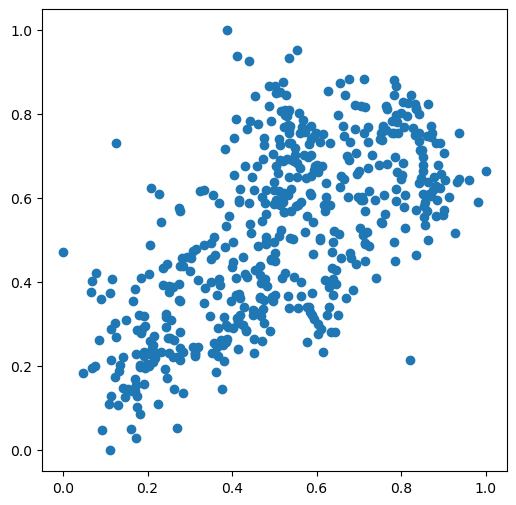

In [24]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

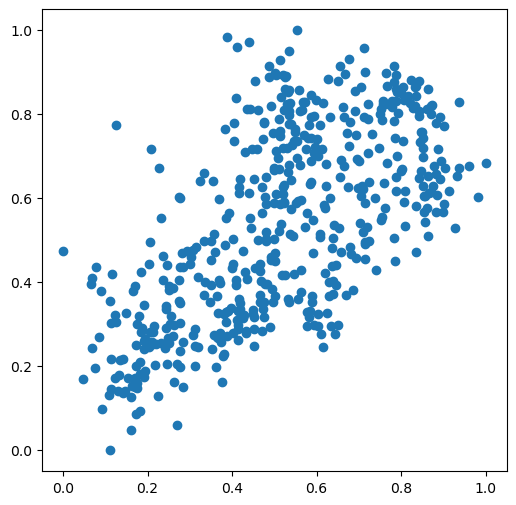

In [25]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

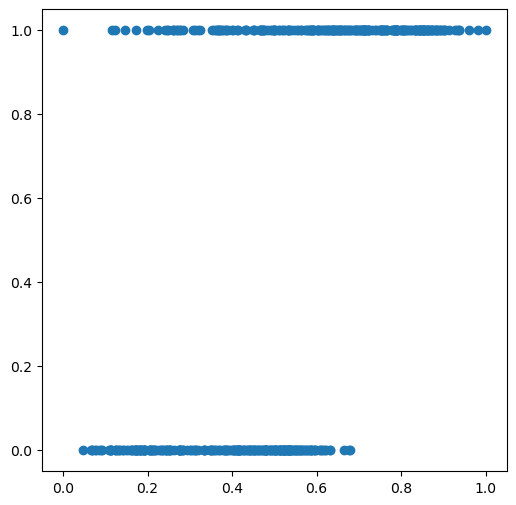

In [26]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.yr)
plt.show()

#### Dividing into X and Y sets for the model building


In [27]:
y_train = df_train.pop('cnt')
X_train = df_train

In [28]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [29]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

     season_spring  season_summer  season_winter  ...  mnth_Oct  mnth_Sep  \
653              0              0              1  ...         1         0   
576              0              0              0  ...         0         0   
426              1              0              0  ...         0         0   
728              1              0              0  ...         0         0   
482              0              1              0  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            1   
576            0            0            0            0            1   
426            0            1            0            0            0   
728            0            0            1            0            0   
482            0            1            0            0            0   

     weekday_Wed  weathersit_good  weathersit_moderate  
653            0                1                    0  
576            0                1                    0  
426            0                0                    1  
728            0                1                    0  
482            0                0                    1  

[5 rows x 29 columns]

### Step 5: Building a linear model

In [30]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [31]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [32]:
# Keeping the selected variable via RFE in col list. We will eliminate the variables manually one by one

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


In [33]:
# Columns which are rejected by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [34]:
X_train_rfe = X_train[col]

In [35]:
def getVIFForTheVars(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [36]:
getVIFForTheVars(X_train_rfe)

Features    VIF
2            workingday  94.57
11          weekday_Sat  22.15
12          weekday_Sun  21.46
13      weathersit_good  10.23
14  weathersit_moderate   8.84
6         season_spring   5.02
1               holiday   4.66
3                  temp   3.62
8         season_winter   3.49
7         season_summer   2.61
4                   hum   1.91
9              mnth_Jul   1.49
10             mnth_Sep   1.30
5             windspeed   1.20
0                    yr   1.03

Workingday has very high VIF

In [37]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.13e-191
Time:                        18:57:42   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0018    

In [38]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

In [39]:
getVIFForTheVars(X_train_new)

Features    VIF
3                   hum  24.72
2                  temp  21.14
12      weathersit_good  14.22
13  weathersit_moderate   8.70
5         season_spring   5.47
4             windspeed   4.63
7         season_winter   4.03
6         season_summer   3.16
0                    yr   2.09
8              mnth_Jul   1.59
9              mnth_Sep   1.40
10          weekday_Sat   1.23
11          weekday_Sun   1.23
1               holiday   1.06

Hummidity is having very high VIF

In [40]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [41]:
getVIFForTheVars(X_train_new)

Features    VIF
11      weathersit_good  14.18
2                  temp  12.55
12  weathersit_moderate   7.90
3             windspeed   4.61
4         season_spring   4.00
5         season_summer   2.73
6         season_winter   2.67
0                    yr   2.08
7              mnth_Jul   1.59
8              mnth_Sep   1.35
9           weekday_Sat   1.23
10          weekday_Sun   1.22
1               holiday   1.06

In [42]:
# As weathersit_good shows high VIF values hence we can drop it
X_train_new = X_train_new.drop(['weathersit_good'], axis = 1)

In [43]:
getVIFForTheVars(X_train_new)

Features   VIF
2                  temp  5.18
3             windspeed  4.56
5         season_summer  2.23
4         season_spring  2.13
0                    yr  2.06
6         season_winter  1.81
7              mnth_Jul  1.59
11  weathersit_moderate  1.52
8              mnth_Sep  1.33
9           weekday_Sat  1.23
10          weekday_Sun  1.22
1               holiday  1.05

VIF values look  good now

In [44]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.84e-163
Time:                        18:57:42   Log-Likelihood:                 444.31
No. Observations:                 510   AIC:                            -862.6
Df Residuals:                     497   BIC:                            -807.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1903    

In [45]:
# Dropping weekday_Sat variable as it has high p-value
X_train_new = X_train_new.drop(['weekday_Sat'], axis = 1)

# Run the function to calculate VIF for the new model
getVIFForTheVars(X_train_new)

Features   VIF
2                  temp  5.14
3             windspeed  4.54
5         season_summer  2.22
4         season_spring  2.11
0                    yr  2.06
6         season_winter  1.79
7              mnth_Jul  1.59
10  weathersit_moderate  1.52
8              mnth_Sep  1.33
9           weekday_Sun  1.18
1               holiday  1.05

In [46]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.33e-164
Time:                        18:57:42   Log-Likelihood:                 443.90
No. Observations:                 510   AIC:                            -863.8
Df Residuals:                     498   BIC:                            -813.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1927    

In [47]:
# Dropping season_spring variable as it has high p-value
X_train_new = X_train_new.drop(['season_spring'], axis = 1)

# Run the function to calculate VIF for the new model
getVIFForTheVars(X_train_new)

Features   VIF
2                 temp  5.10
3            windspeed  3.05
0                   yr  2.00
4        season_summer  1.75
6             mnth_Jul  1.52
9  weathersit_moderate  1.46
5        season_winter  1.44
7             mnth_Sep  1.29
8          weekday_Sun  1.16
1              holiday  1.04

In [48]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     191.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          7.64e-164
Time:                        18:57:42   Log-Likelihood:                 440.80
No. Observations:                 510   AIC:                            -859.6
Df Residuals:                     499   BIC:                            -813.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1257    

In [49]:
# Dropping weekday_Sat variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_Jul'], axis = 1)

# Run the function to calculate VIF for the new model
getVIFForTheVars(X_train_new)

Features   VIF
2                 temp  3.72
3            windspeed  3.02
0                   yr  1.99
4        season_summer  1.56
8  weathersit_moderate  1.45
5        season_winter  1.36
6             mnth_Sep  1.20
7          weekday_Sun  1.16
1              holiday  1.04

In [50]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     211.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.27e-164
Time:                        18:57:42   Log-Likelihood:                 438.62
No. Observations:                 510   AIC:                            -857.2
Df Residuals:                     500   BIC:                            -814.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1300    

In [51]:
# Checking the parameters and their coefficient values
lr_5.params

const                  0.130043
yr                     0.238506
holiday               -0.092033
temp                   0.549011
windspeed             -0.182087
season_summer          0.086736
season_winter          0.117778
mnth_Sep               0.089056
weekday_Sun           -0.042969
weathersit_moderate   -0.068059
dtype: float64

### Inference 

Now as you can see, the VIFs and p-values both are within an acceptable range. 
p-value for all the features are almost 0.0 and R2 is 0.792. Since all the variables are having VIF < 5, no multi coliinear (high VIF) variable is present.
#### We can cosider the above model as aour final model

### Step 6: Residual Analysis of the train data and validation

In [52]:
y_train_pred = lr_5.predict(X_train_lm_5)


#### Normality of error terms


Text(0.5, 0, 'Errors')

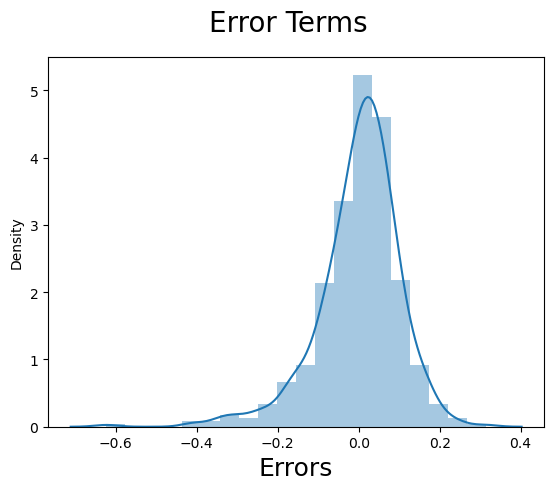

In [53]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Errors are normally distributed with mean 0. Linear Regression assumption is satisfied.

### Step 7: Making Predictions Using the Final Model

In [54]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
#Inspect Training set after scaling
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  season_spring  season_summer  ...  mnth_Oct  mnth_Sep  \
184  0.692706              0              0  ...         0         0   
535  0.712034              0              1  ...         0         0   
299  0.303382              0              0  ...         1         0   
221  0.547400              0              0  ...         0         0   
152  0.569029              0              1  ...         0         0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
184            1            0            0            0            0   
535            0            0            0            0            0   
299            0            0            0            1            0   
221            0            0            0            0            0   
152            0            0            0            1            0   

     weekday_Wed  weathersit_good  weathersit_moderate  
184            0                0                    1  
535            1                1                    0  
299            0                0                    1  
221            1                1                    0  
152            0                1                    0  

[5 rows x 30 columns]

In [55]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt  season_spring  season_summer  ...    mnth_Oct  \
count  219.000000  219.000000     219.000000     219.000000  ...  219.000000   
mean     0.313350    0.520592       0.255708       0.264840  ...    0.082192   
std      0.159947    0.218435       0.437258       0.442259  ...    0.275286   
min     -0.042808    0.048205       0.000000       0.000000  ...    0.000000   
25%      0.198517    0.377531       0.000000       0.000000  ...    0.000000   
50%      0.299459    0.524275       0.000000       0.000000  ...    0.000000   
75%      0.403048    0.672745       1.000000       1.000000  ...    0.000000   
max      0.807474    0.963300       1.000000       1.000000  ...    1.000000   

         mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
count  219.000000   219.000000   219.000000   219.000000   219.000000   
mean     0.086758     0.127854     0.118721     0.146119     0.164384   
std      0.282125     0.334692     0.324202     0.354034     0.371472   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Tue  weekday_Wed  weathersit_good  weathersit_moderate  
count   219.000000   219.000000       219.000000           219.000000  
mean      0.164384     0.100457         0.652968             0.319635  
std       0.371472     0.301297         0.477117             0.467403  
min       0.000000     0.000000         0.000000             0.000000  
25%       0.000000     0.000000         0.000000             0.000000  
50%       0.000000     0.000000         1.000000             0.000000  
75%       0.000000     0.000000         1.000000             1.000000  
max       1.000000     1.000000         1.000000             1.000000  

[8 rows x 30 columns]

In [56]:
y_test = df_test.pop("cnt")
X_test = df_test

In [57]:
test_cols = X_train_new.columns
X_test = X_test[test_cols]
X_test_cons = sm.add_constant(X_test)

#Predict
y_pred = lr_5.predict(X_test_cons)

### Step 8: Model Evaluation

In [58]:
#Evaluate
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7698

Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'y_pred')

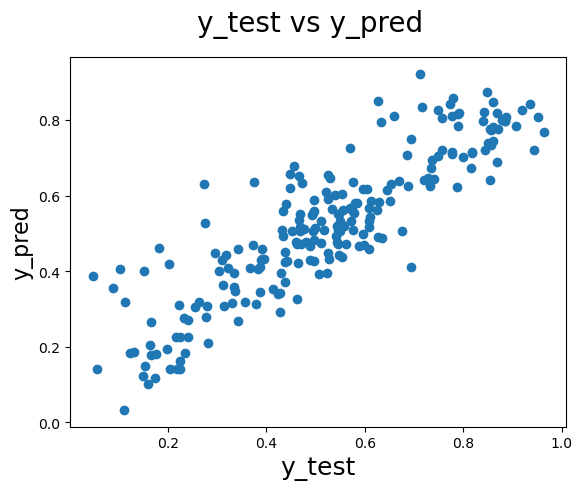

In [59]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)    

We can see that the equation of our best fitted line is:

cnt = 0.2385 * yr - 0.0920 * holiday +  0.5490 * temp - 0.1821 * windspeed + 0.0867 * season_summer + 0.1178 * season_winter + 0.0891 * mnth_Sep - 0.0430 * weekday_Sun - 0.0681 * weathersit_moderate

In [60]:
# Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7599


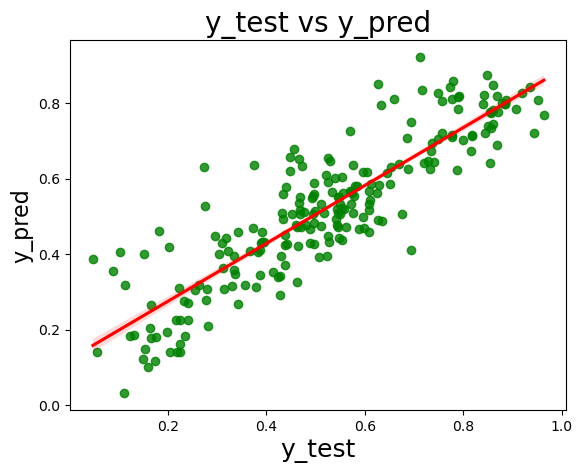

In [61]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Conclusion

Significant variables to predict the demand for shared bikes

yr                    
holiday              
temp                  
windspeed             
summer          
winter          
September               
Sunday           
weathersit_moderate   